In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from pathlib import Path

plt.style.use("seaborn-v0_8-darkgrid")

# Localisation du fichier CSV
current_dir = Path().resolve()
project_root = current_dir.parent
data_path = project_root / "Data" / "Dataset of weighing station temperature measurements.csv"

df = pd.read_csv(data_path, sep=";")

# Conversion de la colonne Time en datetime et mise en index
df["Time"] = pd.to_datetime(df["Time"])
df = df.set_index("Time").sort_index()

df.head()


,Outdoor temperature [deg. C],Outdoor relative humidity [%],T[degC]-Low-S1,T[degC]-Low-S2,T[degC]-Low-S3,T[degC]-Low-S4,T[degC]-Low-S5,T[degC]-Low-S6,T[degC]-Low-S7,T[degC]-Low-S8,...,T[degC]-Top-S20,T[degC]-Top-S21,T[degC]-Top-S22,T[degC]-Top-S23,T[degC]-Top-S24,T[degC]-Top-S25,T[degC]-Top-S26,T[degC]-Top-S27,T[degC]-Top-S28,T[degC]-Top-S29
Time,,,,,,,,,,,,,,,,,,,,,
2023-12-21 12:10:00,-3.883333,42.333333,33.522705,31.560910,34.793104,30.900530,NaN,22.404998,33.093054,NaN,...,8.361203,14.383413,8.152400,11.794627,0.243417,-0.262979,0.135317,0.686731,-0.371935,0.519350
2023-12-21 12:12:00,-3.880000,42.400000,33.803224,31.345106,35.152043,30.010469,NaN,20.637749,32.470107,NaN,...,7.510757,13.676871,8.008640,11.373162,-0.190435,-0.432580,-0.057492,0.495419,-0.384059,0.387556
2023-12-21 12:14:00,-3.876667,42.466667,33.184819,30.096022,32.640345,28.717193,NaN,19.941584,31.789397,NaN,...,8.691577,14.843329,8.229449,11.859397,0.781753,-0.493263,0.411335,1.067664,-0.335581,0.614961
2023-12-21 12:16:00,-3.873333,42.533333,33.534186,31.024726,33.257158,29.600942,NaN,21.224968,31.869777,NaN,...,10.831607,16.998668,10.048923,13.826938,2.526770,0.913081,2.549498,2.620016,-0.178265,1.800967
2023-12-21 12:18:00,-3.870000,42.600000,34.166208,32.214443,34.975090,31.081814,NaN,22.437115,32.675023,NaN,...,10.396931,16.572248,9.798096,13.483880,2.187975,0.471456,1.553302,2.059153,-0.190359,1.612425


In [18]:
# Colonnes de température à l'intérieur du puits
low_cols = [c for c in df.columns if "Low" in c]
mid_cols = [c for c in df.columns if "Mid" in c]
top_cols = [c for c in df.columns if "Top" in c]

# Fonction pour trier par numéro de sonde S1, S2, ...
def sort_by_sensor(col_list):
    return sorted(col_list, key=lambda x: int(x.split("-S")[1]))

low_cols = sort_by_sensor(low_cols)
mid_cols = sort_by_sensor(mid_cols)
top_cols = sort_by_sensor(top_cols)

# print("Nb sondes LOW :", len(low_cols))
# print("Exemple LOW :", low_cols[:5])


In [19]:
zones_dict = {
    "P1": [1, 2, 3, 4, 5],
    "P2": [6, 7, 8, 9],
    "P3": [10, 11, 12, 13, 14],
    "P4": [15, 16, 17, 18, 19],
    "P5": [20, 21, 22, 23, 24],
    "P6": [25, 26, 27, 28, 29],
}

# Température moyenne sous chaque plateau (LOW + MID + TOP)

plateaux_temp = {}   # dict: "P1" série temporelle

for zone_name, sondes in zones_dict.items():
    # Moyenne horizontale sur les sondes de ce plateau pour chaque hauteur
    T_low = df[[low_cols[s-1] for s in sondes]].mean(axis=1)
    T_mid = df[[mid_cols[s-1] for s in sondes]].mean(axis=1)
    T_top = df[[top_cols[s-1] for s in sondes]].mean(axis=1)
    
    # Moyenne verticale (LOW + MID + TOP)
    T_mean = pd.concat([T_low, T_mid, T_top], axis=1).mean(axis=1)
    
    plateaux_temp[zone_name] = T_mean

# DataFrame final : une colonne par plateau
df_plateaux = pd.DataFrame(plateaux_temp)

# smoothing temporel (30 minutes)
df_plateaux_30min = df_plateaux.resample("30min").mean()

df_plateaux_30min.head()


,P1,P2,P3,P4,P5,P6
Time,,,,,,
2023-12-21 12:00:00,35.437290,26.155066,13.954290,9.101483,8.664824,0.920530
2023-12-21 12:30:00,34.401571,24.829086,12.301379,7.666740,7.232826,0.566213
2023-12-21 13:00:00,34.031843,24.507627,12.271837,7.744770,7.486554,0.701877
2023-12-21 13:30:00,33.283745,23.519815,11.630771,7.404863,7.340771,0.809396
2023-12-21 14:00:00,33.189541,23.152036,11.202735,6.914371,7.040444,0.737533


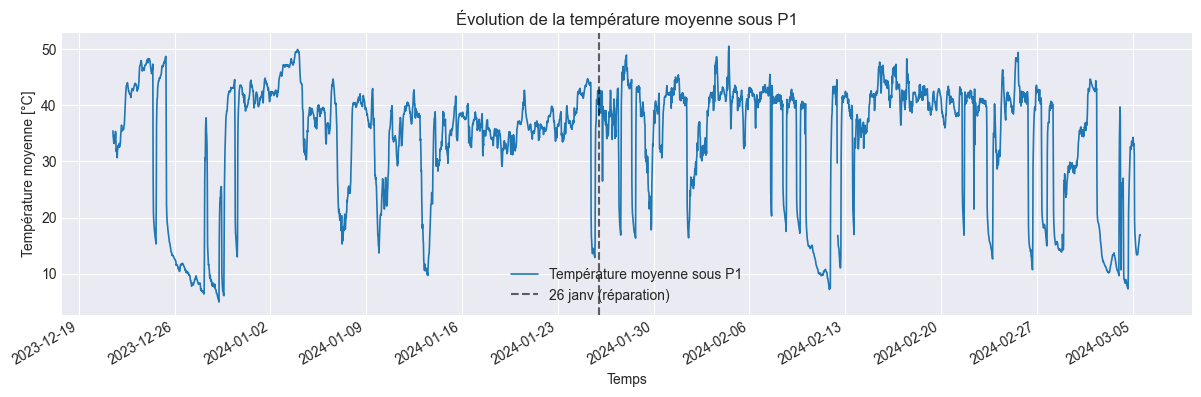

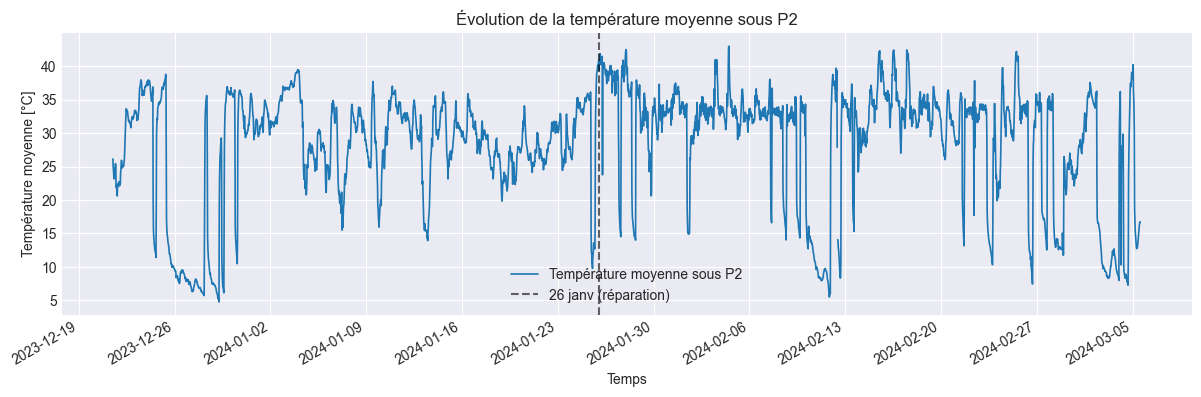

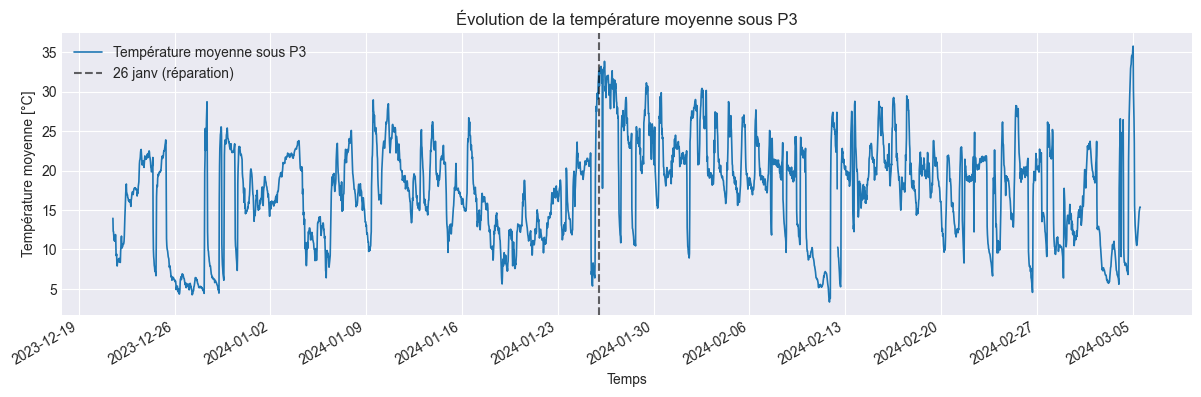

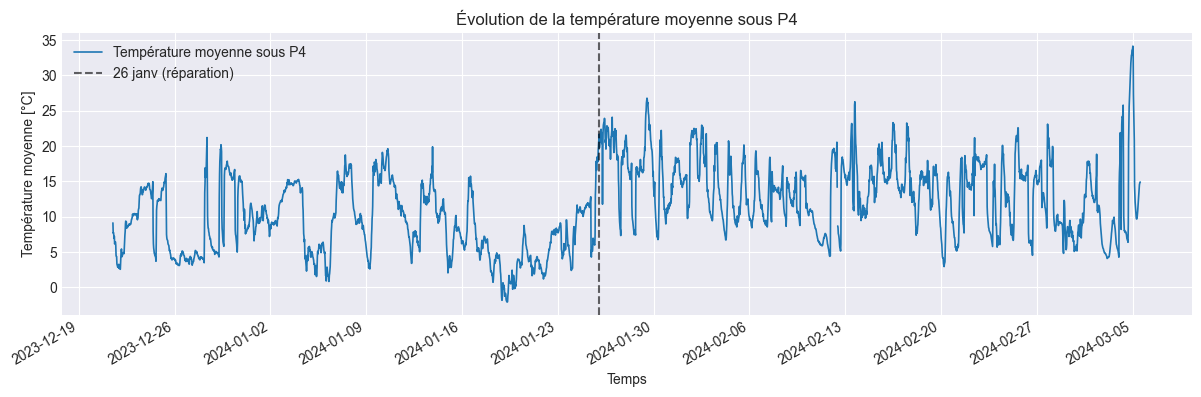

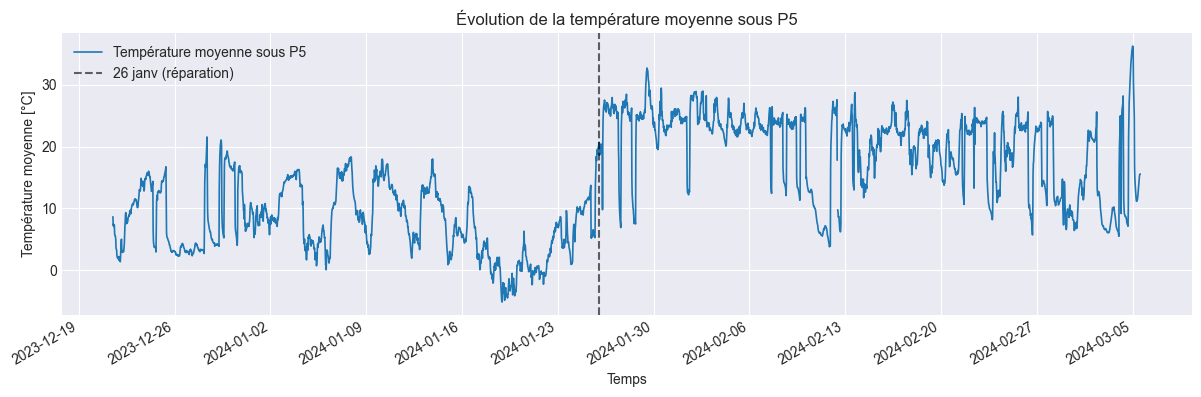

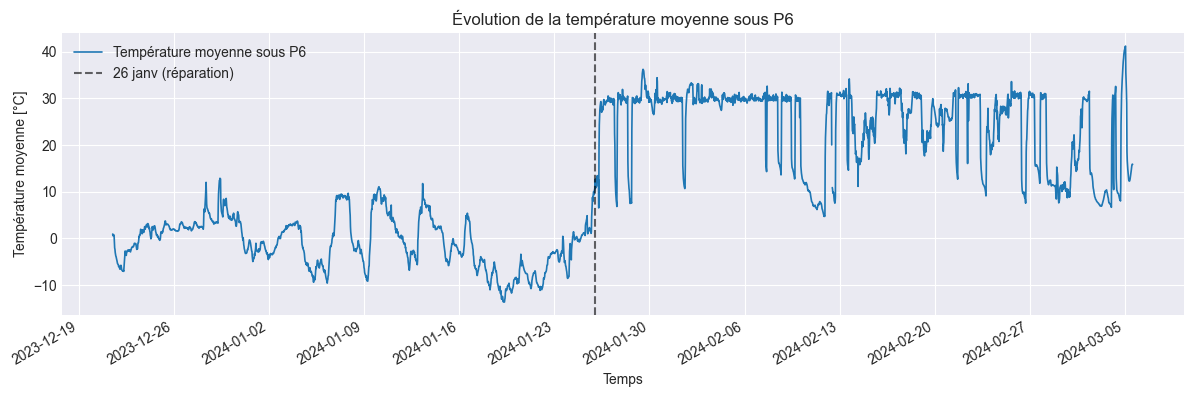

In [20]:
#graph evolution temperature moyenne sous chaque plateau
date_split = dt.datetime(2024, 1, 26)

for plateau in df_plateaux_30min.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df_plateaux_30min.index,
             df_plateaux_30min[plateau],
             label=f"Température moyenne sous {plateau}",
             linewidth=1.2)

    # Ligne verticale pour la réparation du P6 (optionnel)
    plt.axvline(date_split, color="k", linestyle="--", alpha=0.6,
                label="26 janv (réparation)")

    plt.xlabel("Temps")
    plt.ylabel("Température moyenne [°C]")
    plt.title(f"Évolution de la température moyenne sous {plateau}")
    plt.legend()
    plt.tight_layout()

    # Format de l’axe temporel
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.gcf().autofmt_xdate()

    plt.show()


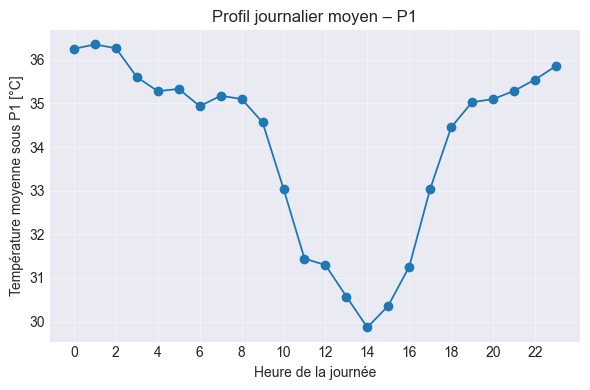

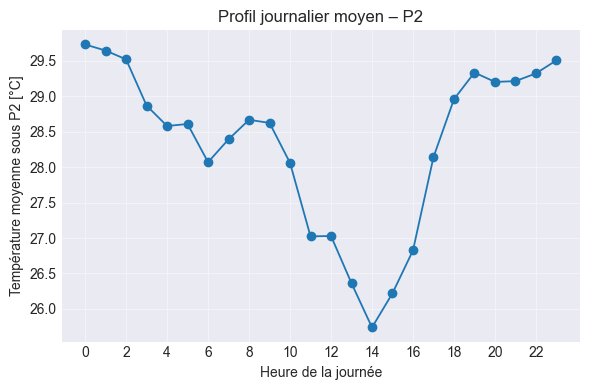

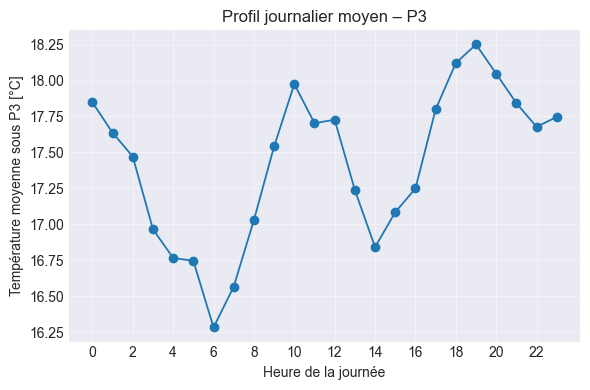

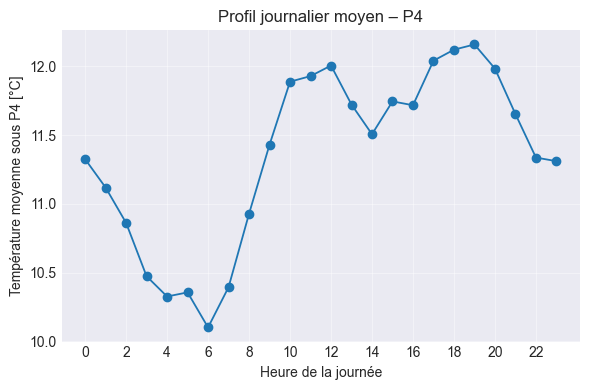

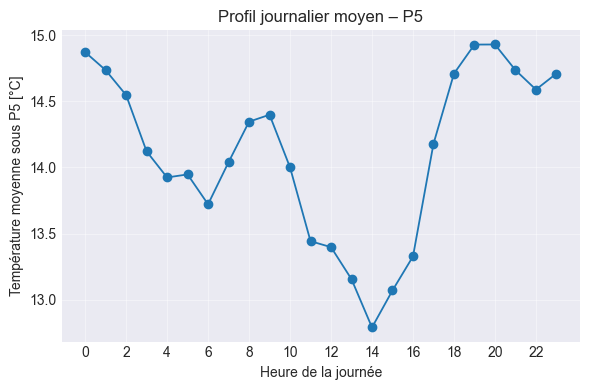

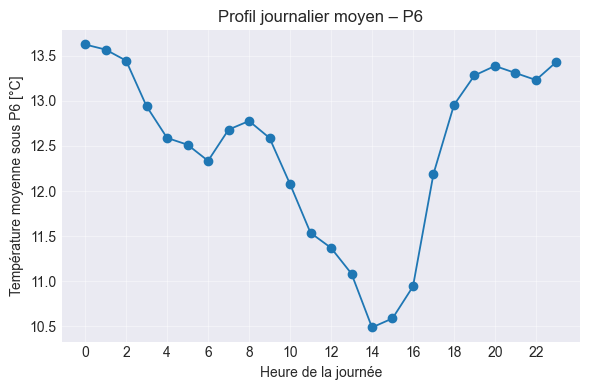

In [21]:
# Profil journalier moyen pour chaque plateau
for p in df_plateaux_30min.columns:
    # moyenne par heure de la journée
    profil_journee = df_plateaux_30min[p].groupby(df_plateaux_30min.index.hour).mean()

    plt.figure(figsize=(6,4))
    plt.plot(profil_journee.index, profil_journee.values, marker="o", linewidth=1.3)
    plt.xlabel("Heure de la journée")
    plt.ylabel(f"Température moyenne sous {p} [°C]")
    plt.title(f"Profil journalier moyen – {p}")
    plt.grid(True, alpha=0.4)
    plt.xticks(range(0,24,2))  # ticks toutes les 2 h (optionnel)
    plt.tight_layout()
    plt.show()

In [22]:
date_split = dt.datetime(2024, 1, 26)

stats_global = {}
stats_avant = {}
stats_apres = {}

for p in df_plateaux_30min.columns:
    s = df_plateaux_30min[p].dropna()

    # Statistiques sur toute la période
    stats_globale[p] = {
        "mean_global": s.mean(),
        "std_global":  s.std(),
        "min_global":  s.min(),
        "max_global":  s.max(),
    }

    # Avant / après 26 janvier
    s_av = s[s.index < date_split]
    s_ap = s[s.index >= date_split]

    stats_avant[p] = {
        "mean_avant": s_av.mean(),
        "min_avant":  s_av.min(),
        "max_avant":  s_av.max(),
    }

    stats_apres[p] = {
        "mean_apres": s_ap.mean(),
        "min_apres":  s_ap.min(),
        "max_apres":  s_ap.max(),
    }

# DataFrames récapitulatifs
df_stats_globale = pd.DataFrame(stats_globale).T
df_stats_avant  = pd.DataFrame(stats_avant).T
df_stats_apres  = pd.DataFrame(stats_apres).T

print("Statistiques globales (toute la période)")
display(df_stats_globale)

print("\nStatistiques avant le 26 janvier")
display(df_stats_avant)

print("Statistiques après le 26 janvier")
display(df_stats_apres)

NameError: name 'stats_globale' is not defined